In [2]:
import tensorflow as tf
import keras as k

In [3]:
tf.__version__

'2.2.0'

In [4]:
gpu_device_name = tf.test.gpu_device_name()
print(gpu_device_name)

/device:GPU:0


In [5]:
k.__version__

'2.4.3'

In [7]:
import pandas as pd
data = data = pd.read_csv("Advertising.csv")
x = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [12]:
k.backend.clear_session()
# 构建序列模型，可以在创建对象时就指定层数，这样就无需用add方法
model = tf.keras.Sequential(
    [   # 第一层：Dense隐藏层，自定义单元个数为10,输入数据为3维,且用relu作为激活
        tf.keras.layers.Dense(10,input_shape=(3,),activation="relu"),
        # 第二层：Dense输出层，单元个数为1(因为output：sale本身就是1维)
        tf.keras.layers.Dense(1)
    ] 
)
info = model.summary()  #可查看当前模型信息
print(info)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model.compile(optimizer="adam",loss="mse")
model.fit(x=x,y=y,epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 7ms/step - loss: 1704.0486
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 1388.5051
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 1129.0192
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 909.2916
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 717.0673
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 564.5081
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 445.0218
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 355.1912
Epoch 9/100
7/7 [==============================] - 0s 8ms/step - loss: 285.5787
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 237.5878
Epoch 11/100
7/7 [==============================] - 0s 7ms/step - loss: 204.7560
Epoch 12/100
7/7 [==============================] - 0s 6ms/step - loss: 181.4376
Epoch 13/100
7/7 [================

In [18]:
x_test = data.iloc[:10,1:-1]
y_true = data.iloc[:10,-1]
y_test = model.predict(x_test)

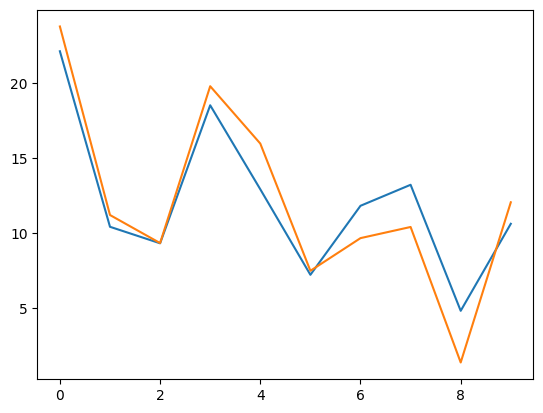

In [19]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(y_true)
plt.plot(y_test)
plt.show()